# Null models for correlation networks

In empirical data, the nodes tend to be correlated with each other owing to trivial factors.
For example, in a time series of stock prices, global economic trends (e.g., recession and inflation) simultaneously affect different stock prices, that can lead to a large correlation between various pairs of stocks. 
In this case, the thresholding approach may yield many spurious edges in the generated network. 

Scola filter out such spurious edges using a null model for correlation matrices that emulates spurious correlation of the data.
We will demonstrate how to generate randomised correlation matrices using the null model. 

We use the historic S&P 500 stock price data retrieved from Yahoo finance, [sp500-log-return.csv](https://raw.githubusercontent.com/skojaku/scola/master/data/sp500-log-return.csv), which contains the logarithmic return of the stock prices of N=488 companies between 2015/01/01 and 2019/01/01 (L=1,008 days; [code to retrieve the data](https://raw.githubusercontent.com/skojaku/scola/master/data/get_sp500_stock_prices.py)).

Download the data

In [1]:
import numpy as np
import pandas as pd

# Load the log return of the stock prices
log_return = pd.read_csv(
    "https://raw.githubusercontent.com/skojaku/scola/develop/data/sp500-log-return.csv",
    sep="\t",
)

L = log_return.shape[0]
N = log_return.shape[1]
ticker_names = log_return.columns
C_samp = log_return.corr().values

Then, construct the correlation matrix 

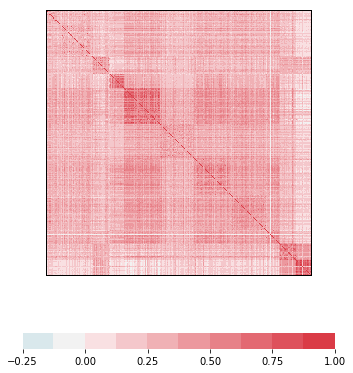

In [3]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns


def plot_corr(A, ax=None, dw=0.125, cbar_length=0.8):

    # Normalize colormap
    min_w = np.min(np.triu(A))
    max_w = np.max(np.triu(A))
    disc_min_w = dw * np.floor(min_w / dw)
    disc_max_w = dw * np.ceil(max_w / dw)
    bounds = np.linspace(
        disc_min_w, disc_max_w, np.round((disc_max_w - disc_min_w) / dw).astype(int) + 1
    )
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw heatmap
    ax = sns.heatmap(
        A,
        cmap=cmap,
        center=0,
        vmax=max_w,
        vmin=min_w,
        square=True,
        mask=A == 0,
        cbar_kws=dict(use_gridspec=False, location="bottom", shrink=cbar_length),
        norm=norm,
        ax=ax,
    )

    ax.set_xticks([])
    ax.set_yticks([])

    # Draw frame
    ax.axhline(y=0, color="k", linewidth=2)
    ax.axhline(y=A.shape[1], color="k", linewidth=2)
    ax.axvline(x=0, color="k", linewidth=2)
    ax.axvline(x=A.shape[0], color="k", linewidth=2)

    return ax


fig = plt.figure(figsize=(7, 7))
ax = plt.gca()
plot_corr(C_samp, ax=ax)
plt.show()

scola.null_models package contains the functions to generate the null correlation matrices.
Three null models for correlation matrices are available in the scola package: White noise model, Hirschberger-Qi-Steuer (HQS) model [1], and the configuration model [2].

In the white noise model, each node is independent of each other. 
Each node has the same variance with that in the given data (i.e., the diagonal elements in the sample correlation matrix).
If the input matrix is the correlation matrix, the variance of a node is equal to one.
Thus, the null correlation matrix for the white noise model is the identity matrix.

You can generate the correlation matrix for the white-noise model by  

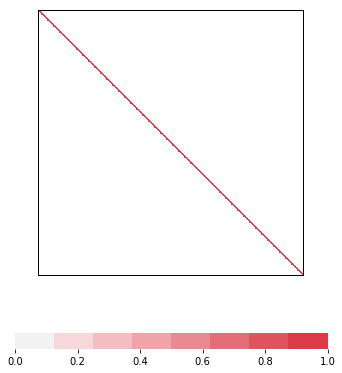

In [7]:
import scola

C_null_wn, K_null_wn, name_wn = scola.null_models.white_noise_model(C_samp)

fig = plt.figure(figsize=(7, 7))
ax = plt.gca()
plot_corr(C_null_wn, ax=ax)
plt.show()

In the Hirschberger-Qi-Steuer (HQS) model [1], each node pair is correlated to the same extent. 
The HQS model preserves the average of the variance of the signal at each node over all the nodes.
(Note that the HQS model does not preserve the variance of individual nodes. It preserves the average of the variance of individual nodes).
Moreover, the HQS model preserves the average and variance of the correlation values over different pairs of nodes in the original correlation matrix. 
The HQS model is analogous to the Erdős-Rényi random graph for networks, in which each pair of nodes is adjacent with the same probability.

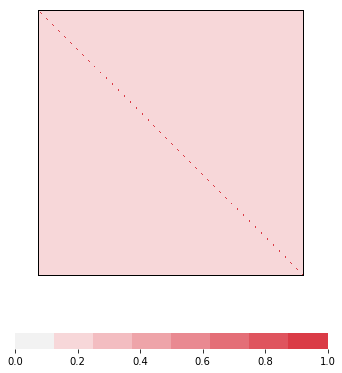

In [10]:
import scola

C_null_hqs, K_null_hqs, name_hqs = scola.null_models.hqs_model(C_samp)

fig = plt.figure(figsize=(7, 7))
ax = plt.gca()
plot_corr(C_null_hqs, ax=ax)
plt.show()

The configuration model [2] generates null correlation matrices that have the same row sum (or column sum) values with those for the sample correlation matrix.
Moreover, each node has the same variance as that in the sample correlation matrix.
The row sum of the correlation matrix is proportional to the correlation between the individual node and the average over all nodes.
For example, in the case of the stock prices, the configuration model preserves the correlation between individual stock prices and the average stock price in the market. 
The configuration model is analogous to the configuration model for networks, which preserves the row sum of the adjacency matrix (i.e., degree of each node).

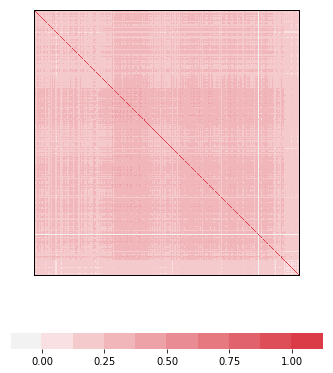

In [11]:
import scola

C_null_config, K_null_config, name_config = scola.null_models.configuration_model(
    C_samp
)

fig = plt.figure(figsize=(7, 7))
ax = plt.gca()
plot_corr(C_null_config, ax=ax)
plt.show()

In [ ]:
# References
[1] 
[2] 